In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io
import os

In [2]:
data_root = 'C:\COCHE_Project\MMBP\data\MMData'
## The list of subject number.
sub_id = list(os.walk(data_root))[0][1]

In [250]:
Rest1 = scipy.io.loadmat('..\data\MMData\\17\processed_rest1.mat')['processed_rest1']
print(Rest1.shape[1])
Sig = Rest1[2, :]
lowcut=1
highcut=50
order=3
b,a = signal.butter(order, [lowcut, highcut], btype='band', fs=2000)
Sig_filtered = signal.lfilter(b, a, Sig)
'''fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,4),dpi=96)
axs[0].plot(Sig)
axs[1].plot(Sig_filtered)'''
ppg_max = 0.2#np.max(Sig_filtered)
ppg_min =-0.2#np.min(Sig_filtered)
Sig_norm = (Sig_filtered - ppg_min) / (ppg_max - ppg_min)
Sig_norm_0 = np.where(Sig_norm < 0.2, 0.2, Sig_norm)
Sig_norm_1 = np.where(Sig_norm_0 > 0.85, 0.85, Sig_norm_0)
Rest1[2, :] = Sig_norm_1

CT = scipy.io.loadmat('..\data\MMData\\17\processed_ct.mat')['processed_ct']
print(CT.shape[1])
Sig = CT[2, :]
lowcut=1
highcut=50
order=3
b,a = signal.butter(order, [lowcut, highcut], btype='band', fs=2000)
Sig_filtered = signal.lfilter(b, a, Sig)
'''fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,4),dpi=96)
axs[0].plot(Sig)
axs[1].plot(Sig_filtered)'''
ppg_max = 0.3#np.max(Sig_filtered)
ppg_min =-0.3#np.min(Sig_filtered)
Sig_norm = (Sig_filtered - ppg_min) / (ppg_max - ppg_min)
Sig_norm_0 = np.where(Sig_norm < 0.25, 0.25, Sig_norm)
Sig_norm_1 = np.where(Sig_norm_0 > 0.75, 0.75, Sig_norm_0)
CT[2, :] = Sig_norm_1

Re = scipy.io.loadmat('..\data\MMData\\17\processed_re.mat')['processed_re']
print(Re.shape[1])
Sig = Re[2, :]
lowcut=1
highcut=50
order=3
b,a = signal.butter(order, [lowcut, highcut], btype='band', fs=2000)
Sig_filtered = signal.lfilter(b, a, Sig)
'''fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,4),dpi=96)
axs[0].plot(Sig)
axs[1].plot(Sig_filtered)'''
ppg_max = 0.2#np.max(Sig_filtered)
ppg_min =-0.2#np.min(Sig_filtered)
Sig_norm = (Sig_filtered - ppg_min) / (ppg_max - ppg_min)
Sig_norm_0 = np.where(Sig_norm < 0.19, 0.19, Sig_norm)
Sig_norm_1 = np.where(Sig_norm_0 > 0.8, 0.8, Sig_norm_0)
Re[2, :] = Sig_norm_1

Rest2 = scipy.io.loadmat('..\data\MMData\\17\processed_rest2.mat')['processed_rest2']
print(Rest2.shape[1])
Sig = Rest2[2, :]
lowcut=1
highcut=50
order=3
b,a = signal.butter(order, [lowcut, highcut], btype='band', fs=2000)
Sig_filtered = signal.lfilter(b, a, Sig)
'''fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,4),dpi=96)
axs[0].plot(Sig)
axs[1].plot(Sig_filtered)'''
ppg_max = 0.2#np.max(Sig_filtered)
ppg_min =-0.2#np.min(Sig_filtered)
Sig_norm = (Sig_filtered - ppg_min) / (ppg_max - ppg_min)
Sig_norm_0 = np.where(Sig_norm < 0.2, 0.2, Sig_norm)
Sig_norm_1 = np.where(Sig_norm_0 > 0.8, 0.8, Sig_norm_0)
Rest2[2, :] = Sig_norm_1

All = np.concatenate((Rest1, CT, Re, Rest2), axis=1)

263200
126200
725400
249800


1364600


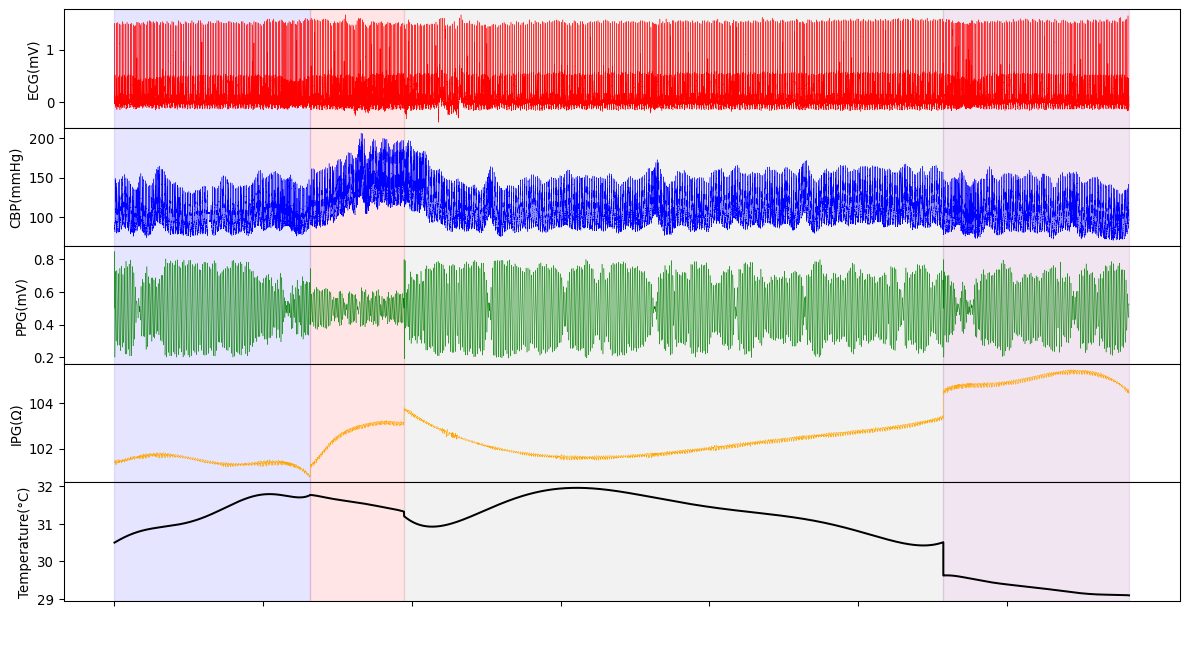

In [255]:
#CT = scipy.io.loadmat('..\data\MMData\\17\processed_ct.mat')['processed_ct']
CT = All
print(CT.shape[1])
'''Sig = CT[2, :]
lowcut=1
highcut=50
order=3
b,a = signal.butter(order, [lowcut, highcut], btype='band', fs=2000)
Sig_filtered = signal.lfilter(b, a, Sig)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,4),dpi=96)
axs[0].plot(Sig)
axs[1].plot(Sig_filtered)
ppg_max = 0.35#np.max(Sig_filtered)
ppg_min =-0.35#np.min(Sig_filtered)
Sig_norm = (Sig_filtered - ppg_min) / (ppg_max - ppg_min)
Sig_norm_0 = np.where(Sig_norm < 0.3, 0.3, Sig_norm)
Sig_norm_1 = np.where(Sig_norm_0 > 0.6, 0.6, Sig_norm_0)
CT[2, :] = Sig_norm_1'''

# Define regions and corresponding colors

fs=2000
begin_index = 0
end_index = CT.shape[1]
x_values = np.arange(begin_index, end_index, step=200000)  # X-axis values at 0, 20000, 40000, ...
time_values = x_values / fs  # Convert to seconds
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15,8),dpi=96)
axs[0].plot(CT[0,:][begin_index:end_index], color='red', linewidth=0.3)
axs[0].set_ylabel('ECG(mV)', position=(0, 500))
axs[1].plot(CT[1,:][begin_index:end_index], color='blue', linewidth=0.3)
axs[1].set_ylabel('CBP(mmHg)')
axs[2].plot(CT[2,:][begin_index:end_index], color='green', linewidth=0.3)
#axs[2].plot(Sig_norm_1[begin_index:end_index], color='green')
axs[2].set_ylabel('PPG(mV)')
axs[3].plot(CT[3,:][begin_index:end_index], color='orange', linewidth=0.3)
axs[3].set_ylabel('IPG(Ω)')
axs[4].plot(CT[4,:][begin_index:end_index], color='black', linewidth=1.5)
axs[4].set_ylabel('Temperature(°C)')
fig.subplots_adjust(hspace=0)
#fig.suptitle(f"S{subid} {int(begin_index/fs)} to {int(end_index/fs)} sec", fontsize=16)
regions = [(0, 263200, 'blue', 'Rest1'), (263200, 389400, 'red', 'Cool Test'), (389400, 1114800, 'grey', 'Recovery'), (1114800, CT.shape[1], '#800080', 'Rest2')]
for region in regions:
    for ax in axs:
        ax.axvspan(region[0], region[1], color=region[2], alpha=0.1)
#fig.text(0.22, 0.085, 'Rest1', fontsize=12, color='blue', ha='center')
#fig.text(0.33, 0.085, 'Cool Test', fontsize=12, color='red', ha='center')
#fig.text(0.527, 0.085, 'Recovery', fontsize=12, color='#444444', ha='center')
#fig.text(0.81, 0.085, 'Rest2', fontsize=12, color='#800080', ha='center')

for ax in axs:
    ax.set_xlabel('Time (s)', color='white')
    ax.set_xticks(x_values)  # Set X-axis ticks based on x_values
    ax.set_xticklabels([f'{int(val/fs)}' for val in x_values], color='white')  # Format X-axis tick labels as time
#suptitle = plt.suptitle('Cool Test')
#suptitle.set_y(0.92)
plt.show()



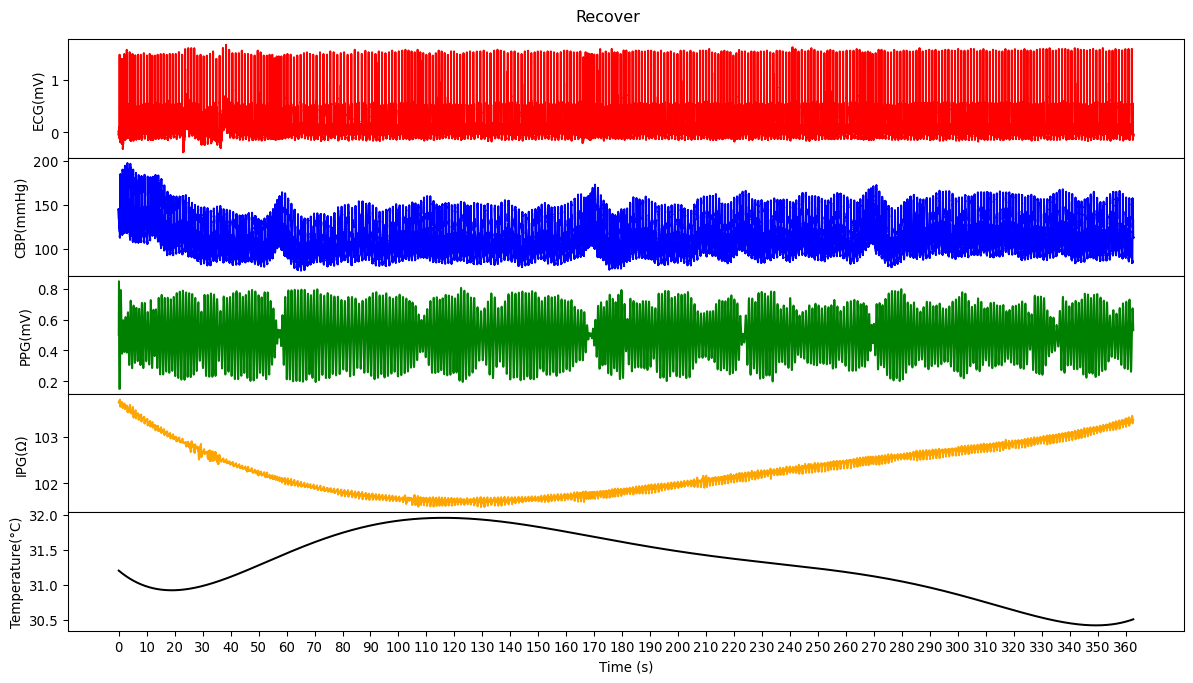

In [170]:
CT = scipy.io.loadmat('..\data\MMData\\17\processed_re.mat')['processed_re']

Sig = CT[2, :]
lowcut=1
highcut=50
order=3
b,a = signal.butter(order, [lowcut, highcut], btype='band', fs=2000)
Sig_filtered = signal.lfilter(b, a, Sig)
'''fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,4),dpi=96)
axs[0].plot(Sig)
axs[1].plot(Sig_filtered)'''
ppg_max = 0.2#np.max(Sig_filtered)
ppg_min =-0.2#np.min(Sig_filtered)
Sig_norm = (Sig_filtered - ppg_min) / (ppg_max - ppg_min)
Sig_norm_0 = np.where(Sig_norm < 0.15, 0.15, Sig_norm)
Sig_norm_1 = np.where(Sig_norm_0 > 0.85, 0.85, Sig_norm_0)
CT[2, :] = Sig_norm_1
fs=2000
begin_index = 0
end_index = CT.shape[1]
x_values = np.arange(begin_index, end_index, step=20000)  # X-axis values at 0, 20000, 40000, ...
time_values = x_values / fs  # Convert to seconds
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15,8),dpi=96)
axs[0].plot(CT[0,:][begin_index:end_index], color='red')
axs[0].set_ylabel('ECG(mV)', position=(0, 500))
axs[1].plot(CT[1,:][begin_index:end_index], color='blue')
axs[1].set_ylabel('CBP(mmHg)')
axs[2].plot(CT[2,:][begin_index:end_index], color='green')
#axs[2].plot(Sig_norm_1[begin_index:end_index], color='green')
axs[2].set_ylabel('PPG(mV)')
axs[3].plot(CT[3,:][begin_index:end_index], color='orange')
axs[3].set_ylabel('IPG(Ω)')
axs[4].plot(CT[4,:][begin_index:end_index], color='black')
axs[4].set_ylabel('Temperature(°C)')
fig.subplots_adjust(hspace=0)
#fig.suptitle(f"S{subid} {int(begin_index/fs)} to {int(end_index/fs)} sec", fontsize=16)
for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_xticks(x_values)  # Set X-axis ticks based on x_values
    ax.set_xticklabels([f'{int(val/fs)}' for val in x_values])  # Format X-axis tick labels as time
suptitle = plt.suptitle('Recover')
suptitle.set_y(0.92)
plt.show()
